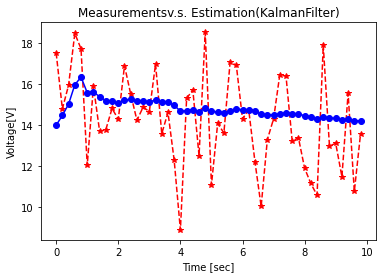

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def get_sensor_data():
    v= np.random.normal(0, 2)
    volt_true= 14
    measurement_z= volt_true+ v
    return measurement_z

def measurement_update(est_x, est_P, measurement_z):
    global H, R
    K = est_P* H**(-1) / (H* est_P* H**(-1) + R)

    x= est_x+ K * ( measurement_z- H* est_x)
    P= est_P- K*H*est_P
    return x, P

def state_prediction(prev_x, prev_P):
    global A, Q
    est_x= A* prev_x
    est_P= A* prev_P* A**(-1) + Q
    return est_x, est_P

# main
n_samples= 50
time_end= 10
dt= time_end/ n_samples

time= np.arange(0, time_end, dt)
x_meas_save= np.zeros(n_samples)
x_esti_save= np.zeros(n_samples)

A= 1
H= 1
Q= 0
R= 4

x_0 = 14  # 초기 예측값
P_0 = 6

x, P= None, None
for i in range(n_samples):
    measurement_z = get_sensor_data()
    if i== 0:
        x, P= x_0, P_0
    else:
        est_x, est_P= state_prediction(x, P)
        x, P= measurement_update(est_x, est_P, measurement_z)

    x_meas_save[i] = measurement_z
    x_esti_save[i] = x

plt.plot(time, x_meas_save, 'r*--', label='Measurements')
plt.plot(time, x_esti_save, 'bo-', label='KalmanFilter')
plt.title('Measurementsv.s. Estimation(KalmanFilter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage[V]')
plt.savefig('simple_kalman_filter.png')
plt.show()